In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.compose import ColumnTransformer
import pickle

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer


In [56]:
pip install mixed-naive-bayes

In [83]:
# read the data set
data=pd.read_csv(r"C:\Users\shubh\Downloads\drug200.csv")


In [4]:
# make the copy of the data set
datac=data.copy()

In [5]:
datac

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [6]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# EDA

In [6]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
datac.shape

(200, 6)

In [8]:
# checking the duplicates
datac.duplicated().sum()

0

In [9]:
datac.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
datac["Drug"].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [11]:
datac["Sex"]=datac["Sex"].astype("category")

## Preprocessing

In [14]:
fv=datac.iloc[:,0:5]
cv=datac.iloc[:,-1]


In [15]:
fv.head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [16]:
cv.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

## EDA after preprocessing


In [17]:
#splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(fea_var,cl_var,test_size=0.2,random_state=1,stratify=cl_var)


In [20]:
d_Eda=pd.concat([x_train,y_train],axis=1)

In [21]:
d_Eda

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
41,58,F,HIGH,NORMAL,14.239,drugB
129,32,F,NORMAL,HIGH,7.477,drugX
65,68,F,NORMAL,NORMAL,27.050,DrugY
39,15,M,NORMAL,HIGH,9.084,drugX
64,60,F,HIGH,HIGH,13.303,drugB
...,...,...,...,...,...,...
96,58,F,LOW,HIGH,38.247,DrugY
185,57,F,NORMAL,NORMAL,25.893,DrugY
66,29,M,HIGH,HIGH,12.856,drugA
132,49,M,LOW,NORMAL,13.598,drugX


In [26]:
d_Eda["BP"].value_counts()

BP
HIGH      62
NORMAL    49
LOW       49
Name: count, dtype: int64

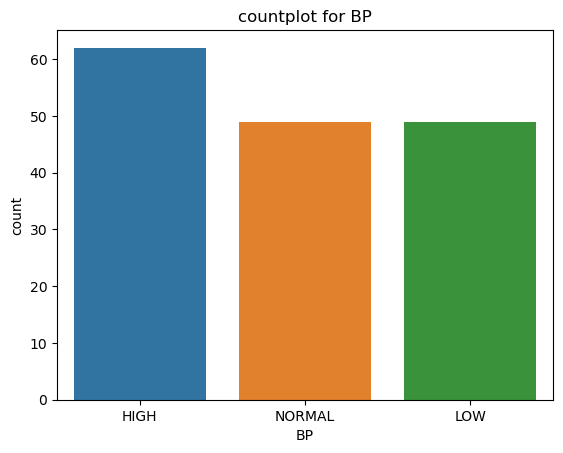

In [27]:
# plotting the countplot to understand the BP column
sns.countplot(x=d_Eda["BP"])
plt.title("countplot for BP")
plt.show()


In [28]:
d_Eda["Sex"].value_counts()

Sex
M    85
F    75
Name: count, dtype: int64

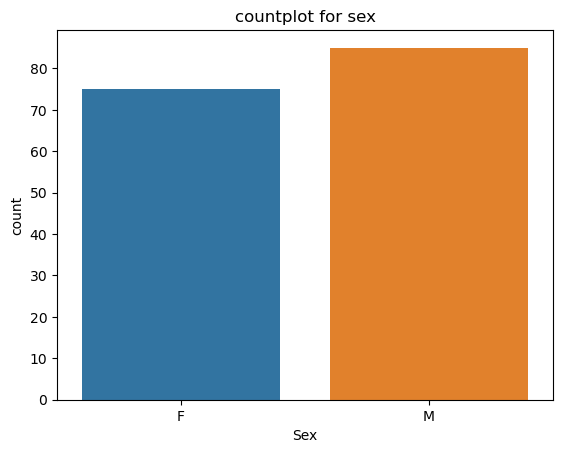

In [29]:
# plotting the countplot to understand the sex column
sns.countplot(x=d_Eda["Sex"])
plt.title("countplot for sex")
plt.show()

In [30]:
d_Eda["Cholesterol"].value_counts()

Cholesterol
HIGH      82
NORMAL    78
Name: count, dtype: int64

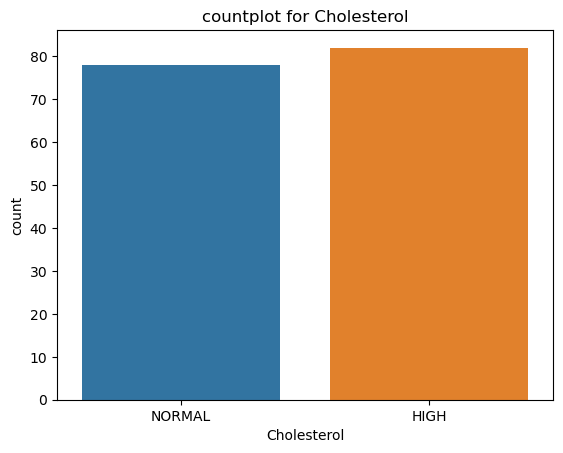

In [31]:
# plotting the countplot to understand the Cholesterol column
sns.countplot(x=d_Eda["Cholesterol"])
plt.title("countplot for Cholesterol")
plt.show()

In [32]:
d_Eda["Drug"].value_counts()

Drug
DrugY    73
drugX    43
drugA    18
drugB    13
drugC    13
Name: count, dtype: int64

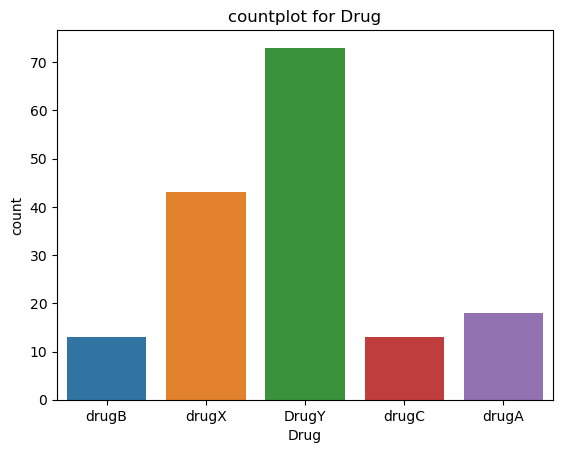

In [33]:
# plotting the countplot to understand the Drug column
sns.countplot(x=d_Eda["Drug"])
plt.title("countplot for Drug")
plt.show()


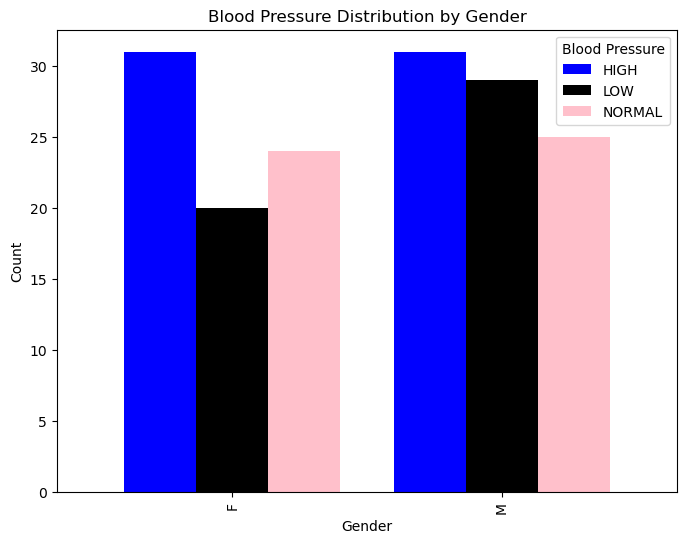

In [35]:
# Group by 'Sex' with respect to 'BP' and calculate the count
grouped_data = d_Eda.groupby(['Sex', 'BP']).size().unstack()

# Plotting the data
ax = grouped_data.plot(kind='bar', color=['blue', 'black', 'pink'], figsize=(8, 6), width=0.8)
ax.set_title('Blood Pressure Distribution by Gender')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')
ax.legend(title='Blood Pressure')

plt.show()

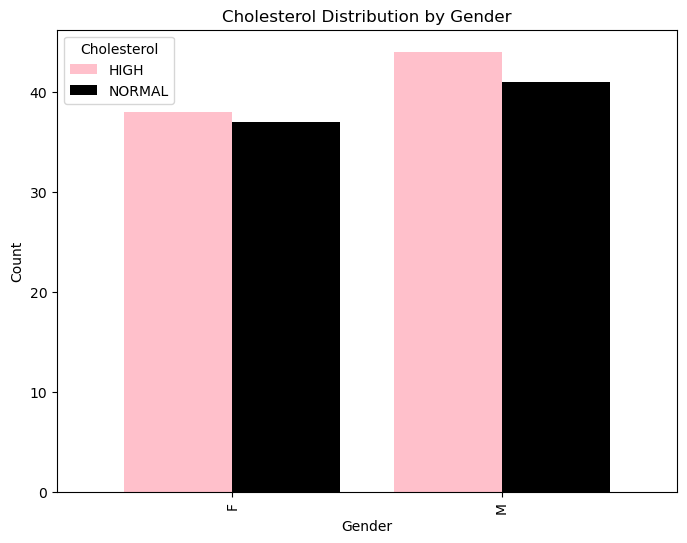

In [37]:
# Group by 'Sex' with respect to 'Cholesterol' and calculate the count
g_data = d_Eda.groupby(['Sex', 'Cholesterol']).size().unstack()

# Plotting the data
ax = g_data.plot(kind='bar', color=['pink', 'black', 'blue'], figsize=(8, 6), width=0.8)
ax.set_title('Cholesterol Distribution by Gender')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')
ax.legend(title='Cholesterol')

plt.show()

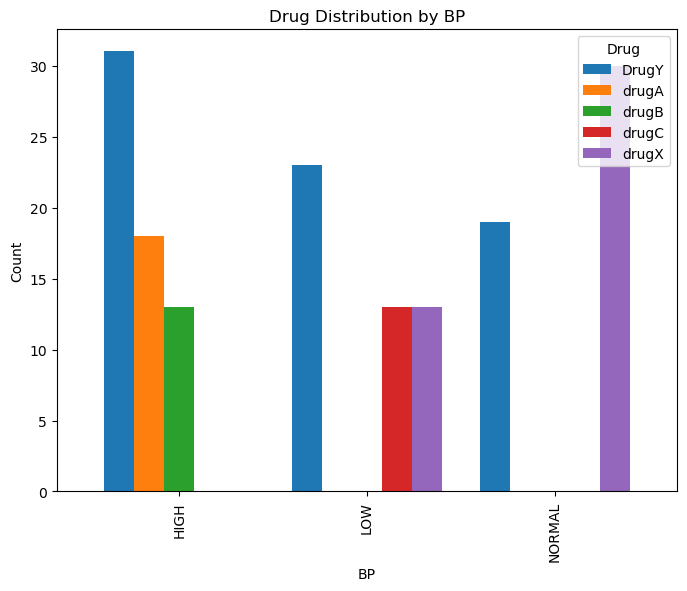

In [38]:
# Group by 'BP' with respect to 'Drug' and calculate the count
g_data1 = d_Eda.groupby(['BP', 'Drug']).size().unstack()

# Plotting the data
ax = g_data1.plot(kind='bar', figsize=(8, 6), width=0.8)
ax.set_title('Drug Distribution by BP')
ax.set_ylabel('Count')
ax.set_xlabel('BP')
ax.legend(title='Drug')

plt.show()

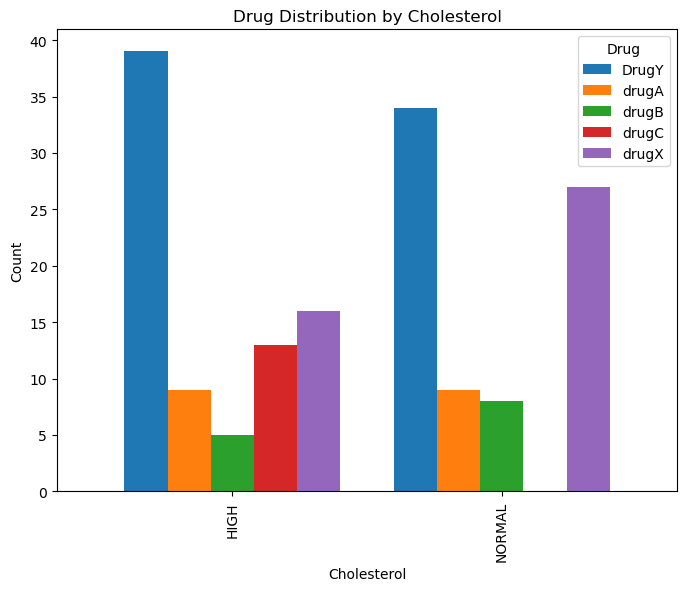

In [39]:
# Group by 'BP' with respect to 'Drug' and calculate the count
g_data1 = d_Eda.groupby(['Cholesterol', 'Drug']).size().unstack()

# Plotting the data
ax = g_data1.plot(kind='bar', figsize=(8, 6), width=0.8)
ax.set_title('Drug Distribution by Cholesterol')
ax.set_ylabel('Count')
ax.set_xlabel('Cholesterol')
ax.legend(title='Drug')

plt.show()

In [41]:
# correlation between age and Na_to_K
cor=d_Eda[['Age', 'Na_to_K']].corr(method = 'pearson')

In [42]:
cor

,Age,Na_to_K
Age,1.000000,-0.046977
Na_to_K,-0.046977,1.000000


Na_to_K


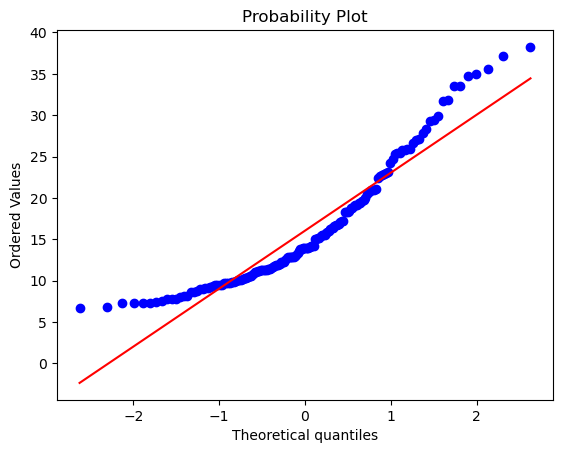

In [43]:
plt.subplot(111)
ss.probplot(d_Eda["Na_to_K"],dist='norm', fit=True, plot=plt)
print("Na_to_K")
plt.show()

Age


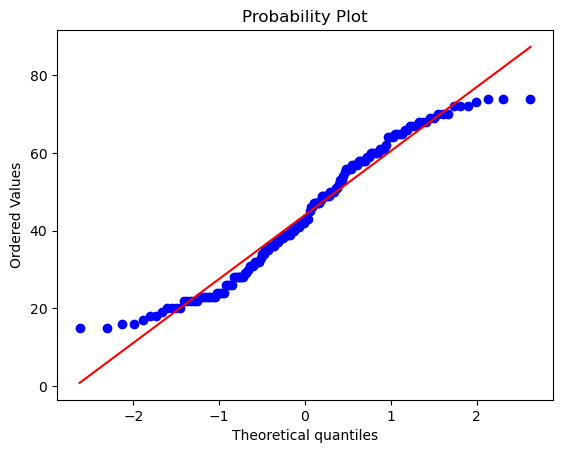

In [44]:
plt.subplot(111)
ss.probplot(d_Eda["Age"],dist='norm', fit=True, plot=plt)
print("Age")
plt.show()

#### These columns are not following the Gaussian distribution so we can transform the columns to follow gaussian distribution



## Feature engineering

In [45]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
41,58,F,HIGH,NORMAL,14.239
129,32,F,NORMAL,HIGH,7.477
65,68,F,NORMAL,NORMAL,27.050
39,15,M,NORMAL,HIGH,9.084
64,60,F,HIGH,HIGH,13.303
...,...,...,...,...,...
96,58,F,LOW,HIGH,38.247
185,57,F,NORMAL,NORMAL,25.893
66,29,M,HIGH,HIGH,12.856
132,49,M,LOW,NORMAL,13.598


In [46]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 41 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          160 non-null    int64   
 1   Sex          160 non-null    category
 2   BP           160 non-null    object  
 3   Cholesterol  160 non-null    object  
 4   Na_to_K      160 non-null    float64 
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 6.5+ KB


In [47]:
y_train


41     drugB
129    drugX
65     DrugY
39     drugX
64     drugB
       ...  
96     DrugY
185    DrugY
66     drugA
132    drugX
49     DrugY
Name: Drug, Length: 160, dtype: object

In [48]:
# seperating the numerical and categorical columns of xtrain to perfom transformation using pipeline
numerical_data=x_train.select_dtypes(include=["int64","float64"])
ordi_data=x_train.select_dtypes(include=["object"])
nomi_data=x_train.select_dtypes(include=["category"])


In [49]:
numerical_data

,Age,Na_to_K
41,58,14.239
129,32,7.477
65,68,27.050
39,15,9.084
64,60,13.303
...,...,...
96,58,38.247
185,57,25.893
66,29,12.856
132,49,13.598


In [50]:
ordi_data

,BP,Cholesterol
41,HIGH,NORMAL
129,NORMAL,HIGH
65,NORMAL,NORMAL
39,NORMAL,HIGH
64,HIGH,HIGH
...,...,...
96,LOW,HIGH
185,NORMAL,NORMAL
66,HIGH,HIGH
132,LOW,NORMAL


In [51]:
nomi_data

,Sex
41,F
129,F
65,F
39,M
64,F
...,...
96,F
185,F
66,M
132,M


## Creating pipeline

In [58]:
#creating a pipeline for numerical columns for imputing missing values, scaling and powertransformation where they are not following the normal distribution
ctp=Pipeline([("input_n",SimpleImputer()),("scaling",StandardScaler()),("power_transformation",PowerTransformer())])

In [59]:
ctp

Pipeline(steps=[('input_n', SimpleImputer()), ('scaling', StandardScaler()),
                ('power_transformation', PowerTransformer())])

In [60]:
# pipeline for ordinal data for imputing missing values and ordinal encoder for encoding because it is a ordinal data
op=Pipeline([("imput_c",SimpleImputer(strategy="most_frequent")),("encoding",OrdinalEncoder())])

In [61]:
op

Pipeline(steps=[('imput_c', SimpleImputer(strategy='most_frequent')),
                ('encoding', OrdinalEncoder())])

In [62]:
# pipeline for ordinal data for imputing missing values and onehot encoder for encoding because it is a nominal data
np=Pipeline([("input_nomi",SimpleImputer(strategy="most_frequent")),("encoding_nomi",OneHotEncoder())])

In [63]:
np

Pipeline(steps=[('input_nomi', SimpleImputer(strategy='most_frequent')),
                ('encoding_nomi', OneHotEncoder())])

In [66]:
# creating column transformer using pipeline created
col=ColumnTransformer([("numerical",ctp,numerical_data.columns),("ordinal",op,ordi_data.columns),("nominal",np,nomi_data.columns)],remainder="passthrough")

In [67]:
col

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('input_n', SimpleImputer()),
                                                 ('scaling', StandardScaler()),
                                                 ('power_transformation',
                                                  PowerTransformer())]),
                                 Index(['Age', 'Na_to_K'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('imput_c',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OrdinalEncoder())]),
                                 Index(['BP', 'Cholesterol'], dtype='object')),
                                ('nominal',
                                 Pipeline(steps=[('input_nomi',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding_nomi',
                                                  OneHotEncoder())]),
                                 Index(['Sex'], dtype='object'))])

In [68]:
# this is the transformed data to transform the train data by using column transformer pipeline 
fx_train=col.fit_transform(x_train)

In [69]:
col.get_feature_names_out()

array(['numerical__Age', 'numerical__Na_to_K', 'ordinal__BP',
       'ordinal__Cholesterol', 'nominal__Sex_F', 'nominal__Sex_M'],
      dtype=object)

In [70]:
fx_train.shape

(160, 6)

In [72]:
fx_test=col.transform(x_test)

In [73]:
y_le = LabelEncoder()
y_train = y_le.fit_transform(y_train)
y_test = y_le.transform(y_test)

## Model creation/Training

In [75]:
mix_nb=MixedNB(categorical_features=[2,3,4,5])

In [76]:
model=mix_nb.fit(fx_train,y_train)
predict=model.predict(fx_test)
accuracy_score(y_test,predict)

0.975

In [77]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



## Deployment

In [79]:
# this is the pipeline for preprocessing that can be used in final model 
finalp=Pipeline([("preprocessed",col)])

In [80]:
finalp

Pipeline(steps=[('preprocessed',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('input_n',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('power_transformation',
                                                                   PowerTransformer())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imput_c',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index(['BP', 'Cholesterol'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('input_nomi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding_nomi',
                                                                   OneHotEncoder())]),
                                                  Index(['Sex'], dtype='object'))]))])

In [81]:
# final mixed naive bayes model for both numerical,categorical data where this can be used for any model 
model=mix_nb.fit(finalp.fit_transform(x_train),y_train)

C:\Users\shubh\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:423: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if categorical_features == 'all':
C:\Users\shubh\anaconda3\Lib\site-packages\mixed_naive_bayes\mixed_naive_bayes.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif self.categorical_features == 'all':


In [84]:
pickle.dump(finalp,open(r"C:\Users\shubh\Downloads\finalp_drugs.pkl","wb"))
pickle.dump(model,open(r"C:\Users\shubh\Downloads\model_drugs.pkl","wb"))

In [88]:
pre_drugs=pickle.load(open(r"C:\Users\shubh\Downloads\finalp_drugs.pkl","rb"))
model_drugs=pickle.load(open(r"C:\Users\shubh\Downloads\model_drugs.pkl","rb"))



In [89]:
pre_drugs

Pipeline(steps=[('preprocessed',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('input_n',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler()),
                                                                  ('power_transformation',
                                                                   PowerTransformer())]),
                                                  Index(['Age', 'Na_to_K'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imput_c',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index(['BP', 'Cholesterol'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('input_nomi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding_nomi',
                                                                   OneHotEncoder())]),
                                                  Index(['Sex'], dtype='object'))]))])

In [90]:
model_drugs

MixedNB(alpha=0.5, var_smoothing=1e-09)